In [ ]:
from skimage import feature
import cv2

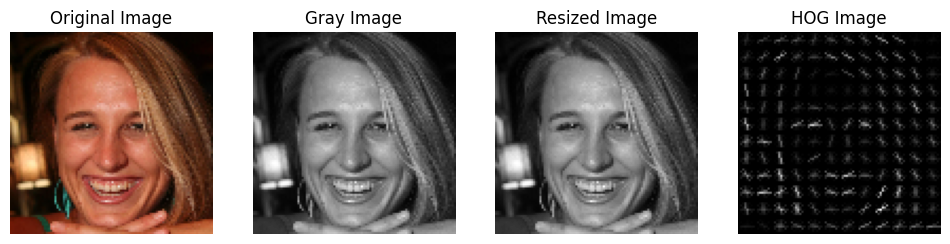

In [1]:
import cv2
from skimage import feature, io
import matplotlib.pyplot as plt
import os

def process_image(image_path):
    # Đọc ảnh từ đường dẫn
    original_image = cv2.imread(image_path)
    
    # Chuyển ảnh sang màu RGB từ BGR (do OpenCV dùng BGR mặc định)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    # Chuyển ảnh sang ảnh xám
    original_image_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    
    # Resize ảnh về kích thước 96x96
    resized_image = cv2.resize(original_image_gray, (96, 96))
    
    # Tính toán HOG descriptors và lấy ảnh HOG để hiển thị
    hog_features, hog_image = feature.hog(resized_image, orientations=9, pixels_per_cell=(8, 8),
                                          cells_per_block=(3, 3), block_norm='L2-Hys', visualize=True,
                                          transform_sqrt=True)
    
    # Tạo figure và subplot
    plt.figure(figsize=(12, 3))  # Điều chỉnh kích thước figure cho phù hợp
    
    # Hiển thị ảnh gốc
    plt.subplot(141)
    plt.title("Original Image")
    plt.imshow(original_image_rgb)
    plt.axis('off')
    
    # Hiển thị ảnh xám
    plt.subplot(142)
    plt.title("Gray Image")
    plt.imshow(original_image_gray, cmap='gray')
    plt.axis('off')
    
    # Hiển thị ảnh đã resize
    plt.subplot(143)
    plt.title("Resized Image")
    plt.imshow(resized_image, cmap='gray')
    plt.axis('off')
    
    # Hiển thị ảnh HOG    
    plt.subplot(144)
    plt.title("HOG Image")
    plt.imshow(hog_image, cmap='gray')
    plt.axis('off')
    
    # Hiển thị tất cả
    plt.tight_layout()  # Đảm bảo các subplot không bị chồng lên nhau
    plt.show()

# Đường dẫn thư mục chứa các ảnh
image_folder = "image/happy/"

# Lấy danh sách các tệp ảnh trong thư mục
image_files = os.listdir(image_folder)

# Lặp qua từng tệp ảnh và xử lý
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    print(f"Processing image: {image_path}")
    process_image(image_path)
